In [1]:
import matplotlib.pyplot as plt
# from erddapClient import ERDDAP_Griddap
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import cmocean

from mpl_toolkits.basemap import Basemap
from matplotlib import colors

In [38]:
# Global Ocean Colour (Copernicus-GlobColour), Bio-Geo-Chemical, L4 (monthly and interpolated) from Satellite Observations (Near Real Time)
file_id = Dataset('/home/jamie/projects/chl_plots/data/cli_day_sum_20240118.nc')
ras = file_id.variables["cli_day_sum_20240118"][:]
#mask = file_id.variables["mask"][:]
lat = file_id.variables["latitude"][:]
lon = file_id.variables["longitude"][:]
file_id.close()

# convert to xarray. 
ras = xr.DataArray(ras[1,:,:], 
                   coords={'x': lat, 'y':lon}, 
                   dims=["x", "y"])

# fudging the nubers to get the colormap nice. 
# ras_colorbar = ras.clip(min = 0, max = 0.012, keep_attrs=False)
ras.data = ras.data * 365
ras = ras.clip(min = -0.0035, max = 0.0045, keep_attrs=False)

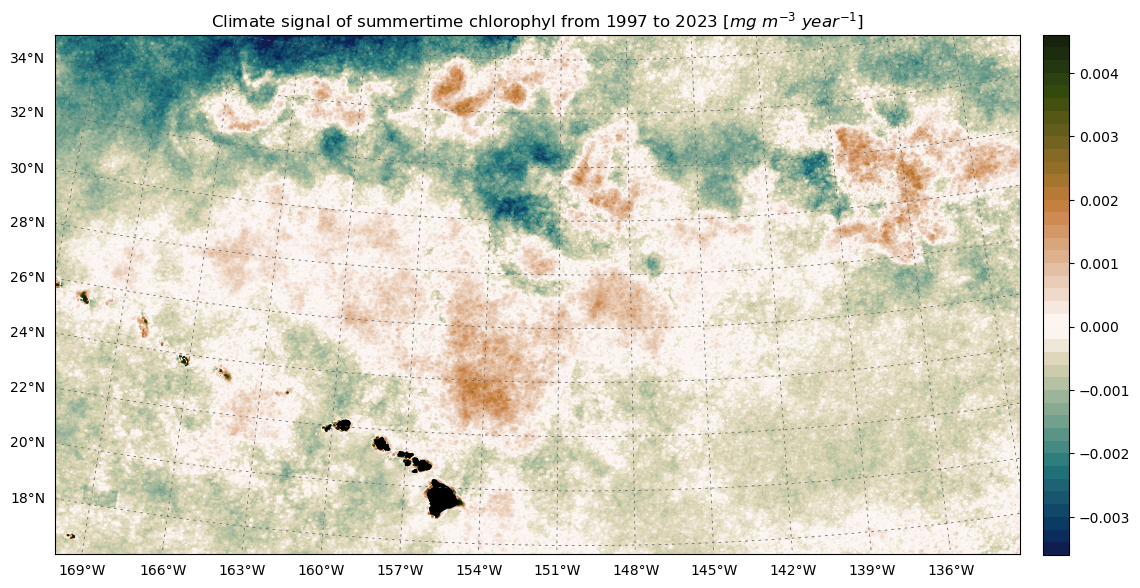

In [39]:
divnorm = colors.TwoSlopeNorm(vmin = np.nanmin(ras.data), vcenter = 0, vmax = np.nanmax(ras.data))

# Calculate the bounds of the data
lon_bounds = [ras.y.min(), ras.y.max()]
lat_bounds = [ras.x.min(), ras.x.max()]

fig, (ax1) = plt.subplots(1, 1, figsize=(15, 7))
m = Basemap(projection='lcc', resolution='h', 
            llcrnrlat=16, urcrnrlat=35.5, 
            llcrnrlon=-170, urcrnrlon=-130,
            lat_0 = 30, lon_0 = -150,
            width=5.1E6, height=5E6)

# Convert latitude and longitude to map projection coordinates.
x_map, y_map = np.meshgrid(ras.y, ras.x)
x, y = m(x_map, y_map)
# Plot data.
contour = m.contourf(x, y, ras, cmap = cmocean.cm.tarn_r, levels=100, extend='both', norm=divnorm)
m.fillcontinents(color = 'black')
# Add grid lines
parallels = m.drawparallels(np.arange(18, 40, 2), labels=[1,0,0,0], textcolor = 'black', color = "dimgrey", fontsize=10, dashes=(3, 5), linewidth = 0.6)
meridians =  m.drawmeridians(np.arange(-175, -130, 3), labels=[0,0,0,1], textcolor = 'black', color = "dimgrey", fontsize=10, dashes=(3, 5),linewidth = 0.6)
# Draw parallels and meridians with customized gridline alpha and label colors
m.drawcoastlines(color='black')
# add colorbar.
c = ax1.contourf(ras.y, ras.x, ras, levels = 50, cmap = cmocean.cm.tarn_r, norm=divnorm)
cbar = fig.colorbar(c, shrink = 0.965, pad = 0.02)
plt.title("Climate signal of summertime chlorophyl from 1997 to 2023 [$mg$ $m^{-3}$ $year^{-1}$]")
plt.savefig('../figures/climat_slope_chl_20240813.png', bbox_inches='tight', dpi=300)
plt.show()